<a href="https://colab.research.google.com/github/EugeneHsiung/datasci_6_regression/blob/main/datasci_6_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Packages**

In [81]:
import pandas as pd
import re
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.stats.outliers_influence import variance_inflation_factor
!pip install ucimlrepo

# **Loading dataset**

In [ ]:
df = pd.read_csv('/content/parkinsons_updrs.data')
df

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [ ]:
# Check for missing values in a column
print(df.isnull().sum())

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64


In [ ]:
# Cleaning the columns

def clean_column(df):
  def clean_name(name):
        cleaned_name = re.sub(r'[^a-zA-Z0-9]', '', name)
        return cleaned_name.lower()

  df.columns = [clean_name(col) for col in df.columns]
  return df

df1 = clean_column(df)
df1

,subject,age,sex,testtime,motorupdrs,totalupdrs,jitter,jitterabs,jitterrap,jitterppq5,...,shimmerdb,shimmerapq3,shimmerapq5,shimmerapq11,shimmerdda,nhr,hnr,rpde,dfa,ppe
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


# **Simple Linear Regression**

## **Variables**
### **Independent Variable (IV)**: Age
### **Dependent Variable (DV)**: Jitter(Abs)


In [ ]:
# extracting data for regression
X = sm.add_constant(df['age'])  # IV: Age
# fit the regression model
model = sm.OLS(df['jitterabs'], X) # DV: jitterabs
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              jitterabs   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.491
Date:                Sat, 11 Nov 2023   Prob (F-statistic):            0.00622
Time:                        14:20:45   Log-Likelihood:                 51784.
No. Observations:                5875   AIC:                        -1.036e+05
Df Residuals:                    5873   BIC:                        -1.035e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.459e-05   3.48e-06      9.943      0.0

In [ ]:
residuals = results.resid  # differences of observed values and values predicted (linear regression)
fitted = results.fittedvalues # predicted values of the dependent variable based of IV

## **Intepretation:** The R-squared value is 0.001 suggesting relationship between age and Abs Jitter is weak. Only 1% of of the Abs jitter can be explained by age.

# **Checking Assumptions**

In [ ]:
# Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=1.8852594856590454, p-value=2.1915702334657264e-65


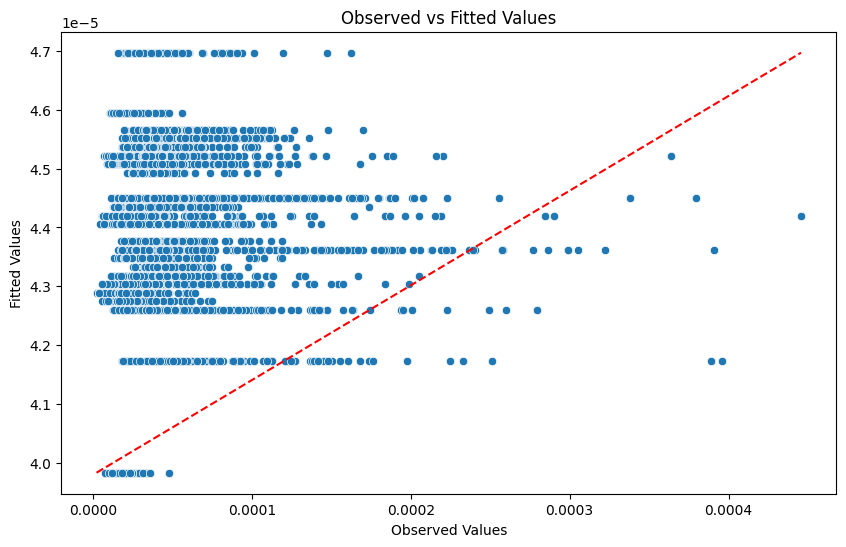

In [ ]:
# Plot observed vs fitted values (from code 37)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['jitterabs'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['jitterabs']), max(df['jitterabs'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()

In [ ]:
# Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.7226054072380066, p-value=0.0


**Interpretation**: P value of 0 indicates that the residuals do not follow normal distribution

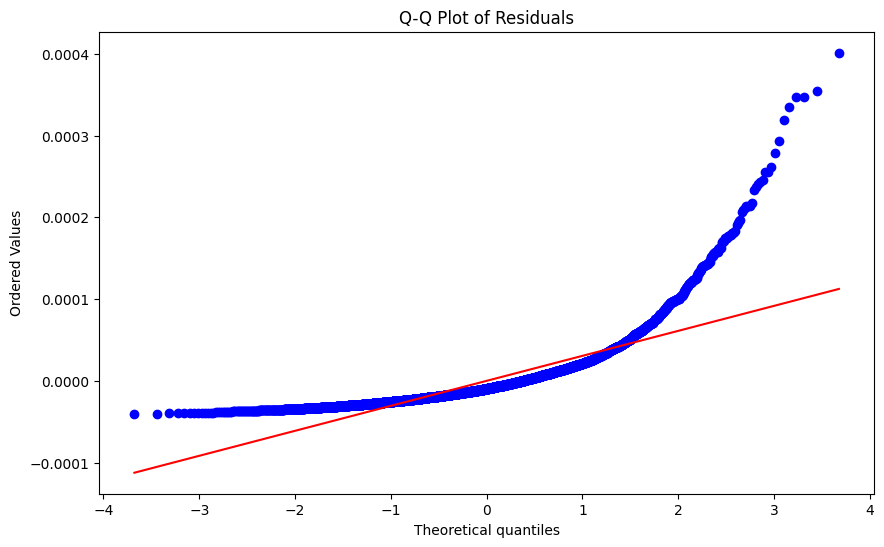

In [ ]:
# Plot Q-Q plot of residuals

plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

**Interpretation**: Residuals do not follow normal distrubtion.

In [ ]:
# Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=1.3641227571188588, p-value=2.3423162515259668e-17


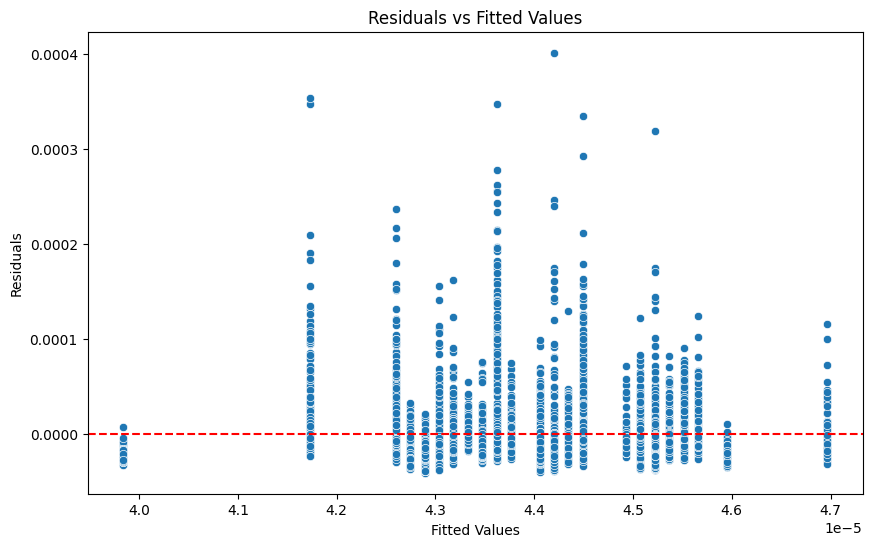

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

**Goldfeld-Quandt Test Results:** P-value is 2.34e-17, close to 0, less than 0.05 (signifcance) suggesting strong evidence against homoscedasticity.

# **Multiple Linear Regression**

## **Variables**
### **Independent Variable (IV)**: age, testtime, motorupdrs, shimmerdb (motorupdrs and shimmerdb are measures of variation in amplitude)
### **Dependent Variables (DV)**: jitterppq5

In [71]:
X = df[['age', 'testtime', 'motorupdrs', 'shimmerdb']]
X = sm.add_constant(X)
y = df['jitterppq5']

#create and fit linear regression model
model = sm.OLS(y, X)
results2 = model.fit()

print(results2.summary())

residuals1 = results2.resid
fitted_1 = results2.fittedvalues

                            OLS Regression Results                            
Dep. Variable:             jitterppq5   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     1755.
Date:                Sat, 11 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:53:00   Log-Likelihood:                 26821.
No. Observations:                5875   AIC:                        -5.363e+04
Df Residuals:                    5870   BIC:                        -5.360e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.000      5.604      0.0

**Interpretation:** The R-squared value is 0.545 indicating 54.5% of 'jitterppq5' is explained by 'age', 'testtime', 'motorupdrs', 'shimmerdb (IV variables).

In [66]:
# Checking multicollinearity using VIF (Variance Inflation Factor)

vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns #stores IV variables
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] #calculates VIF of IV varaibles
print("\nVIF Data:")
print(vif_data)


VIF Data:
     Variable        VIF
0       const  58.092365
1         age   1.088797
2    testtime   1.006168
3  motorupdrs   1.093577
4   shimmerdb   1.021141


**Interpretation:** No multicollinearity for independent variables because all VIF<10

In [67]:
#Assessing linearity of the relationship
stat, p_value = linear_rainbow(results2)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=1.908962099735596, p-value=8.073519256047172e-68


**Intepretation:** p-value=8.07e-68 indicates the data is not linear and no relationship among the idenpendent variables

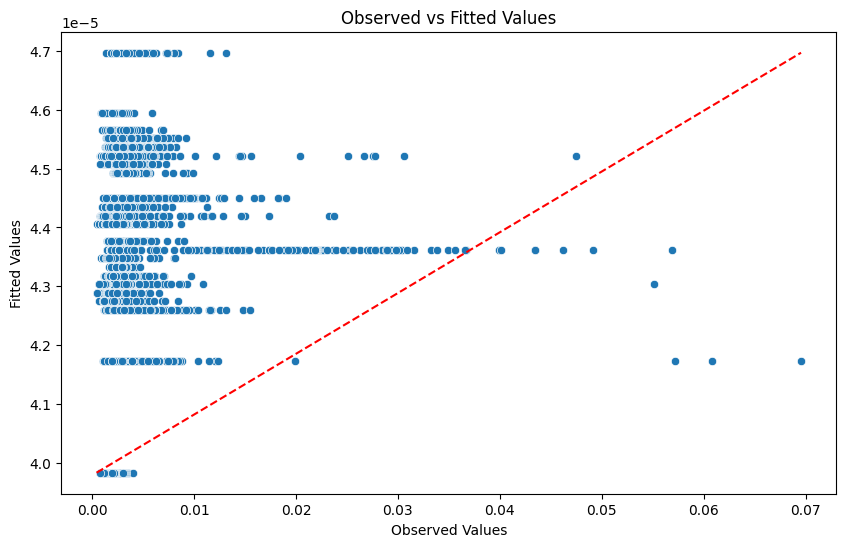

In [68]:
# Residuals vs Fitted Values

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['jitterppq5'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['jitterppq5']), max(df['jitterppq5'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()

In [76]:
# Assessing normality of the residuals
W, p_value = shapiro(residuals1) #defined in line 65
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.6390647888183594, p-value=0.0


**Interpretation:** P value of 0 indicates that the residuals do not follow normal distribution

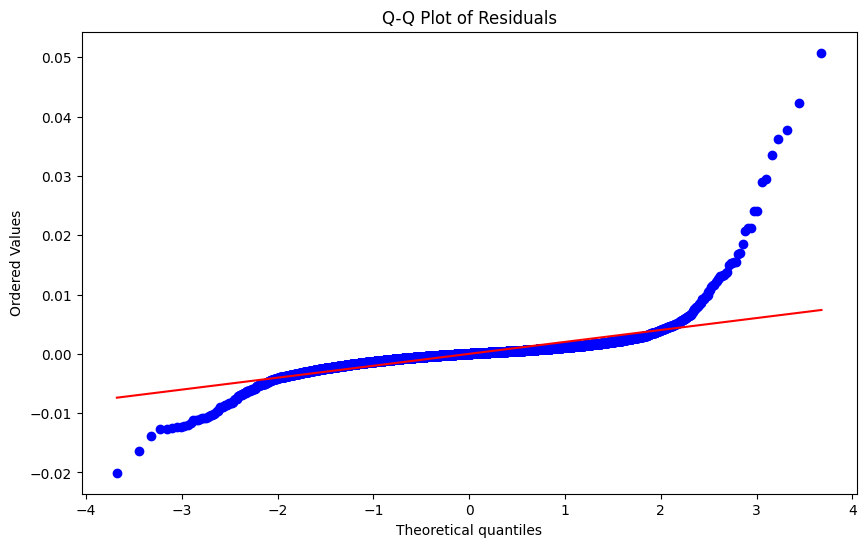

In [72]:
# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals1, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [79]:
# Assessing Homogeneity
gq_test = het_goldfeldquandt(residuals1, results2.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=2.667601032498847, p-value=5.2587335791659e-150


**Goldfeld-Quandt Test Results:** P-value is 5.258e-150, close to 0, less than 0.05 (signifcance) suggesting strong evidence against homoscedasticity.

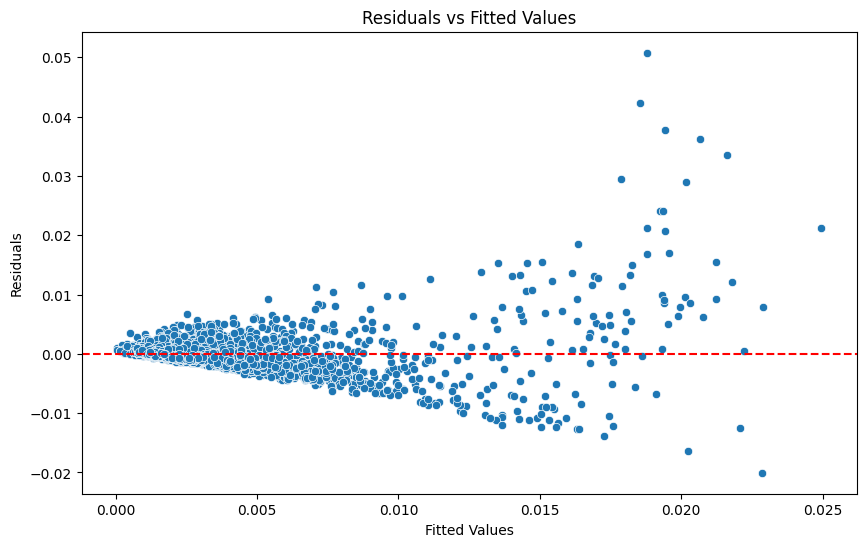

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_1, y=residuals1)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()